### Hospital e Leito
Fonte: OpenDataSUS

In [165]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

hospital_e_leitos_br = pd.read_csv("dados/Leitos_2024.csv", encoding='ISO-8859-1')

# Limpeza de dados
hospital_e_leitos_pb = hospital_e_leitos_br[(hospital_e_leitos_br['UF'] == 'PB')]

hospital_e_leitos_pb = hospital_e_leitos_pb.drop(['REGIAO', 'UF', 'MOTIVO_DESABILITACAO', 'CO_TIPO_UNIDADE', 'NATUREZA_JURIDICA', 'NO_COMPLEMENTO'], axis=1)

hospital_e_leitos_pb[['NU_TELEFONE', 'NO_EMAIL']] = hospital_e_leitos_pb[['NU_TELEFONE', 'NO_EMAIL']].fillna('Não se aplica')

hospital_e_leitos_pb = hospital_e_leitos_pb.rename(columns={
    'COMP':'ANO_MES_COMPETENCIA',
    'CNES':'ID_CNES',
    'TP_GESTAO':'TIPO_GESTAO'
})

hospital_e_leitos_pb['TIPO_GESTAO'] = hospital_e_leitos_pb['TIPO_GESTAO'].replace({
    'M':'Municipal',
    'E':'Estadual',
    'D':'Dupla',
    'S':'Sem Gestão'
})

### SIH João Pessoa
Fonte: Base dos dados

In [166]:
# Dicionário de Variáveis (https://pcdas.icict.fiocruz.br/conjunto-de-dados/sistema-de-informacoes-hospitalares-do-sus-sihsus/dicionario-de-variaveis/)
sih_pb_2024 = pd.read_csv('dados/dados_sih_pb_2024.csv')

# Limpeza de dados
sih_pb_2024 = sih_pb_2024.drop(['UF_ZI', 'CGC_HOSP', 'N_AIH', 'IDENT', 'CEP', 'MUNIC_RES', 'NASC', 'SEXO',
                                'UTI_MES_IN', 'UTI_MES_AN', 'UTI_MES_AL', 'UTI_MES_TO','UTI_INT_IN', 
                                'UTI_INT_AN', 'UTI_INT_AL', 'UTI_INT_TO', 'DIAR_ACOM', 'QT_DIARIAS',
                                'PROC_SOLIC', 'VAL_SH', 'VAL_SP', 'VAL_SADT', 'VAL_RN', 'VAL_ACOMP',
                                'VAL_ORTP', 'VAL_SANGUE', 'VAL_SADTSR', 'VAL_TRANSP', 'VAL_OBSANG',
                                'VAL_PED1AC', 'VAL_UTI', 'US_TOT', 'DIAG_SECUN','COBRANCA', 'NATUREZA',
                                'NAT_JUR', 'GESTAO', 'RUBRICA', 'IND_VDRL', 'COD_IDADE', 'NACIONAL', 'NUM_PROC',
                                'CAR_INT', 'TOT_PT_SP', 'INSTRU', 'CID_NOTIF', 'CONTRACEP1', 'CONTRACEP2', 'GESTRISCO',
                                'INSC_PN', 'GESTOR_COD', 'GESTOR_TP', 'GESTOR_CPF', 'GESTOR_DT', 'CNPJ_MANT', 'INFEHOSP', 'CID_ASSO',
                                'CID_MORTE', 'COMPLEX', 'FINANC', 'FAEC_TP', 'REGCT', 'AUD_JUST', 'SIS_JUST', 'VAL_SH_FED', 'DIAGSEC6',
                                'DIAGSEC7', 'DIAGSEC8', 'DIAGSEC9', 'TPDISEC1', 'TPDISEC4', 'TPDISEC5', 'TPDISEC6', 'TPDISEC7', 'TPDISEC8', 'TPDISEC9', 
                                'CBOR', 'CNAER', 'VINCPREV', 'CPF_AUT', 'HOMONIMO', 'NUM_FILHOS', 'SEQ_AIH5', 'RACA_COR', 'ETNIA', 'SEQUENCIA', 'REMESSA',
                                'VAL_SP_FED', 'VAL_SH_GES', 'VAL_SP_GES', 'VAL_UCI', 'MARCA_UCI', 'DIAGSEC1', 'DIAGSEC2', 'DIAGSEC3', 'DIAGSEC4', 'DIAGSEC5',
                                'TPDISEC2', 'TPDISEC3', 'MARCA_UTI'], axis=1)

sih_pb_2024 = sih_pb_2024.rename(columns={
    'ESPEC': 'especialidade_leito',
    'PROC_REA': 'procedimento_realizado',
    'VAL_TOT': 'valor_total_aih',
    'DT_INTER': 'dt_internacao',
    'DT_SAIDA': 'dt_saida',
    'DIAG_PRINC': 'cid_principal',
    'MUNIC_MOV': 'municipio_estabelecimento',
    'DIAS_PERM': 'dias_permanencia',
    'MORTE': 'obito',
    'CNES': 'id_cnes',
})

sih_pb_2024 = sih_pb_2024[sih_pb_2024['MES_CMPT'] <= 11]

/tmp/ipykernel_856/512246821.py:2: DtypeWarning: Columns (97,98,99,100,101,102) have mixed types. Specify dtype option on import or set low_memory=False.
  sih_pb_2024 = pd.read_csv('dados/dados_sih_pb_2024.csv')


### DataFrame com o fluxo de internações e capacidade em leitos do SUS
Os dados são de janeiro até julho de 2024

In [167]:
# pegando apenas o ano e mes e inserindo em nova coluna
sih_pb_2024['mes_ano'] = sih_pb_2024['dt_internacao'].astype(str).str[:6]
sih_pb_2024['mes_ano_saida'] = sih_pb_2024['dt_saida'].astype(str).str[:6]
sih_pb_2024 = sih_pb_2024[sih_pb_2024['mes_ano'] >= '202401'] # pega apenas o ano de 2024
hospital_e_leitos_pb['mes_ano_leitos'] = hospital_e_leitos_pb['ANO_MES_COMPETENCIA'].astype(str)

# pegando as quantidade de entrada, saidas e leitos por hospital e mês
qtd_entradas = sih_pb_2024.groupby(['id_cnes', 'mes_ano', 'dt_internacao']).size().reset_index(name='qtd_entradas')
qtd_saidas = sih_pb_2024.groupby(['id_cnes', 'mes_ano_saida', 'dt_saida']).size().reset_index(name='qtd_saidas')
qtd_saidas = qtd_saidas.rename(columns={'mes_ano_saida': 'mes_ano', 'dt_saida': 'data'})
qtd_entradas = qtd_entradas.rename(columns={'dt_internacao': 'data'})
qtd_leitos_sus = hospital_e_leitos_pb[['ID_CNES', 'mes_ano_leitos', 'LEITOS_SUS']]

# juntando e limpando o novo df
df_ocupacao_mensal = pd.merge(qtd_entradas, qtd_saidas, on=['id_cnes', 'mes_ano', 'data'], how='outer')
df_ocupacao_mensal = pd.merge(df_ocupacao_mensal, hospital_e_leitos_pb[['ID_CNES', 'mes_ano_leitos', 'LEITOS_SUS', 'DS_TIPO_UNIDADE']], left_on=['id_cnes', 'mes_ano'], right_on=['ID_CNES', 'mes_ano_leitos'], how='left')

df_ocupacao_mensal = df_ocupacao_mensal.drop(['mes_ano_leitos', 'ID_CNES'], axis=1)
df_ocupacao_mensal = df_ocupacao_mensal.rename(columns={'LEITOS_SUS': 'total_leitos_sus'})
df_ocupacao_mensal = df_ocupacao_mensal[df_ocupacao_mensal['total_leitos_sus'].notna()]
df_ocupacao_mensal['qtd_entradas'] = df_ocupacao_mensal['qtd_entradas'].fillna(0).astype(int)
df_ocupacao_mensal['qtd_saidas'] = df_ocupacao_mensal['qtd_saidas'].fillna(0).astype(int)
df_ocupacao_mensal['total_leitos_sus'] = df_ocupacao_mensal['total_leitos_sus'].astype(int)

df_ocupacao_mensal['dif_entrada_saida'] = df_ocupacao_mensal['qtd_entradas'] - df_ocupacao_mensal['qtd_saidas']
df_ocupacao_mensal['leitos_ocupados'] = df_ocupacao_mensal.groupby(['id_cnes'])['dif_entrada_saida'].cumsum() 

df_ocupacao_mensal['taxa_ocupacao_pct'] = df_ocupacao_mensal['leitos_ocupados'] / df_ocupacao_mensal['total_leitos_sus'] * 100
df_ocupacao_mensal['taxa_ocupacao_pct'] = df_ocupacao_mensal['taxa_ocupacao_pct'].round(2)
df_ocupacao_mensal

,id_cnes,mes_ano,data,qtd_entradas,qtd_saidas,total_leitos_sus,DS_TIPO_UNIDADE,dif_entrada_saida,leitos_ocupados,taxa_ocupacao_pct
0,147907,202401,20240101,4,0,50,HOSPITAL GERAL,4,4,8.00
1,147907,202401,20240102,1,1,50,HOSPITAL GERAL,0,4,8.00
2,147907,202401,20240104,1,0,50,HOSPITAL GERAL,1,5,10.00
3,147907,202401,20240105,3,0,50,HOSPITAL GERAL,3,8,16.00
4,147907,202401,20240106,1,1,50,HOSPITAL GERAL,0,8,16.00
...,...,...,...,...,...,...,...,...,...,...
26910,9467718,202411,20241126,6,12,246,HOSPITAL GERAL,-6,23,9.35
26911,9467718,202411,20241127,6,3,246,HOSPITAL GERAL,3,26,10.57
26912,9467718,202411,20241128,3,16,246,HOSPITAL GERAL,-13,13,5.28
26913,9467718,202411,20241129,0,4,246,HOSPITAL GERAL,-4,9,3.66


<Axes: title={'center': 'Distribuição da Ocupação Média Diária'}, xlabel='Média de Ocupação Diária', ylabel='Count'>

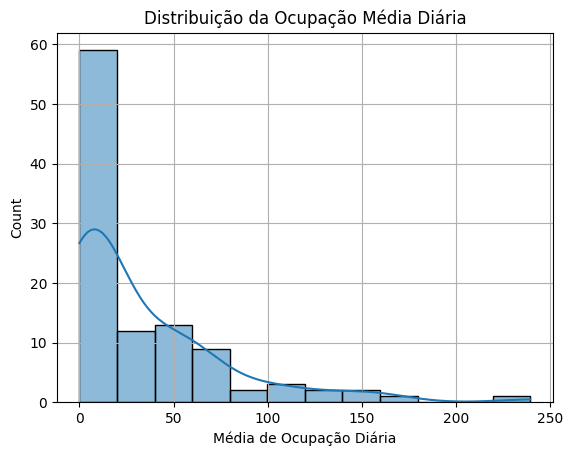

In [168]:
# ocupacao_media_diaria = entrada_media * dias_permanencia_media
entrada_stats = df_ocupacao_mensal.groupby(['id_cnes'])['qtd_entradas'].mean(numeric_only=True).round(2)
permanencia_stats = sih_pb_2024.groupby(['id_cnes'])['dias_permanencia'].mean().round(2)
df_stats = pd.DataFrame({
    'qtd_entradas_mean': entrada_stats,
    'dias_permanencia_mean': permanencia_stats
    })

df_stats['ocupacao_media_diaria'] = df_stats['qtd_entradas_mean'] * df_stats['dias_permanencia_mean']
df_stats['ocupacao_media_diaria'] = df_stats['ocupacao_media_diaria'].round(2)
df_stats['tipo_unidade'] = hospital_e_leitos_pb.groupby(['ID_CNES'])['DS_TIPO_UNIDADE'].first()
df_stats['nome_hospital'] = hospital_e_leitos_pb.groupby(['ID_CNES'])['NOME_ESTABELECIMENTO'].first()
df_stats['municipio'] = hospital_e_leitos_pb.groupby(['ID_CNES'])['MUNICIPIO'].first()

df_stats['qtd_entradas_mean'] = df_stats['qtd_entradas_mean'].fillna(0)
df_stats['dias_permanencia_mean'] = df_stats['dias_permanencia_mean'].fillna(0)
df_stats['ocupacao_media_diaria'] = df_stats['ocupacao_media_diaria'].fillna(0)

# distribuição geral da média de ocupação em 2024
plt.title('Distribuição da Ocupação Média Diária')
plt.xlabel('Média de Ocupação Diária')
plt.grid(True)
sns.histplot(data=df_stats, x='ocupacao_media_diaria', kde=True)

### Média de Ocupação vs Tipos de Unidades

<Axes: title={'center': 'Tipos de Unidade com SUS na Paraíba'}, xlabel='DS_TIPO_UNIDADE', ylabel='Quantidade de Unidades'>

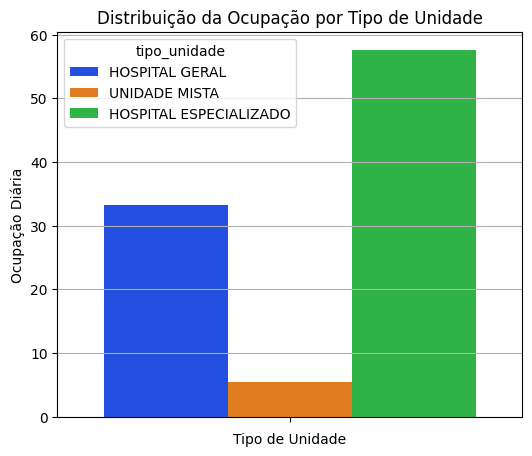

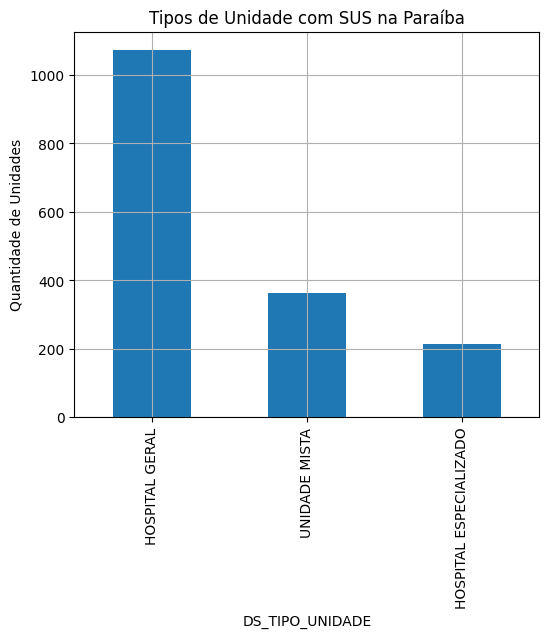

In [169]:
plt.subplots(figsize=(6, 5))
plt.title('Distribuição da Ocupação por Tipo de Unidade')
plt.ylabel('Ocupação Diária')
plt.xlabel('Tipo de Unidade')
plt.grid(True)
sns.barplot(data=df_stats, y='ocupacao_media_diaria', hue='tipo_unidade', errorbar=None, palette='bright')

# quantificar os tipos de unidades na Paraíba
plt.subplots(figsize=(6, 5))
plt.title('Tipos de Unidade com SUS na Paraíba')
plt.ylabel('Quantidade de Unidades')
plt.xlabel('Tipo de Unidade')
tipos_unidades_sus = hospital_e_leitos_pb[hospital_e_leitos_pb['LEITOS_SUS'] > 0]
tipos_unidades_sus['DS_TIPO_UNIDADE'].value_counts().plot(kind='bar', grid=True)

/tmp/ipykernel_856/3289051226.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


(Média de Ocupação)
Média: 33.31 / Mediana: 9.76 / Moda: 0.0
IQR: 47.91
Limite Inferior: -67.52
Limite Superior: 124.13
------------Outliers------------
              municipio  ocupacao_media_diaria            tipo_unidade
id_cnes                                                               
2362856  CAMPINA GRANDE                 239.35          HOSPITAL GERAL
2399628     JOAO PESSOA                 154.65          HOSPITAL GERAL
2400324     JOAO PESSOA                 150.85          HOSPITAL GERAL
2593262     JOAO PESSOA                 136.10          HOSPITAL GERAL
2613735  CAMPINA GRANDE                 128.94  HOSPITAL ESPECIALIZADO
9467718      SANTA RITA                 167.16          HOSPITAL GERAL
------------Resumo------------
count    104.00
mean      33.31
std       43.64
min        0.00
25%        4.35
50%        9.76
75%       52.26
max      239.35
Name: ocupacao_media_diaria, dtype: float64
------------Top 6 Hospitais Mais Ocupados------------


/tmp/ipykernel_856/3289051226.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


,nome_hospital,municipio,ocupacao_media_diaria
id_cnes,,,
2362856,HOSPITAL EMERGENCIA E TRAUMA DOM LUIZ GONZAGA ...,CAMPINA GRANDE,239.35
9467718,HOSPITAL METROPOLITANO DOM JOSE MARIA PIRES,SANTA RITA,167.16
2399628,COMPLEXO HOSPITALAR DE MANGABEIRA GOV TARCISIO...,JOAO PESSOA,154.65
2400324,HOSPITAL EDSON RAMALHO,JOAO PESSOA,150.85
2593262,HOSPITAL DE EMERGENCIA E TRAUMA SENADOR HUMBER...,JOAO PESSOA,136.10
2613735,CLINICA DR MAIA,CAMPINA GRANDE,128.94


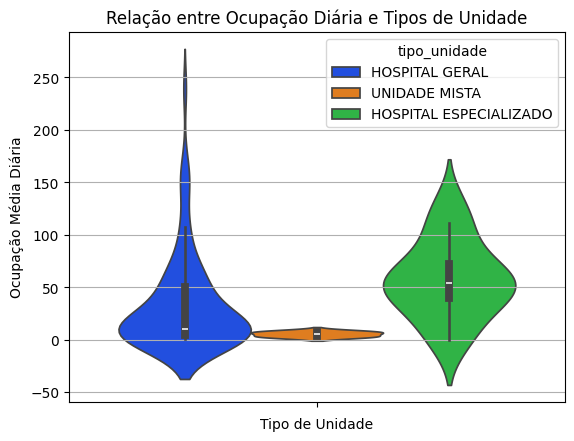

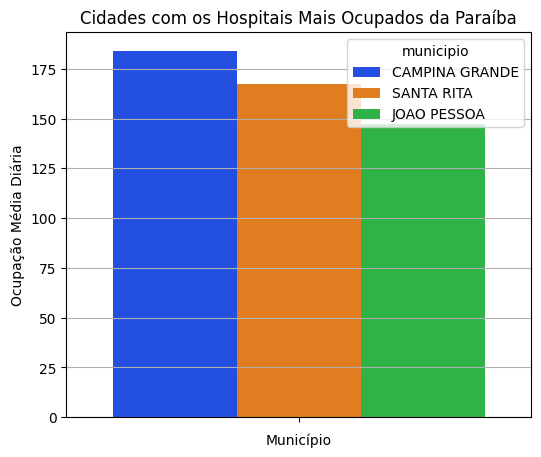

In [170]:
plt.title('Relação entre Ocupação Diária e Tipos de Unidade')
plt.ylabel('Ocupação Média Diária')
plt.xlabel('Tipo de Unidade')
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
sns.violinplot(data=df_stats, hue='tipo_unidade', y='ocupacao_media_diaria', palette='bright')

# top 6 hospitais mais ocupados
top_6_hospitais = df_stats.nlargest(6, 'ocupacao_media_diaria')
plt.subplots(figsize=(6, 5))
plt.title('Cidades com os Hospitais Mais Ocupados da Paraíba')
plt.ylabel('Ocupação Média Diária')
plt.xlabel('Município')
plt.grid(True)  
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
sns.barplot(data=top_6_hospitais, hue='municipio', y='ocupacao_media_diaria', errorbar=None, palette='bright')

# medidas de centralidade
print(f"(Média de Ocupação)\nMédia: {df_stats['ocupacao_media_diaria'].mean():.2f} / Mediana: {df_stats['ocupacao_media_diaria'].median():.2f} / Moda: {df_stats['ocupacao_media_diaria'].mode().iloc[0]}")

# medidas de variabilidade
q1 = df_stats['ocupacao_media_diaria'].quantile(0.25)
q3 = df_stats['ocupacao_media_diaria'].quantile(0.75)
IQR_ocupacao = q3 - q1
lim_inferior = q1 - 1.5 * IQR_ocupacao
lim_superior = q3 + 1.5 * IQR_ocupacao
print(f"IQR: {IQR_ocupacao:.2f}")
print(f"Limite Inferior: {lim_inferior:.2f}")
print(f"Limite Superior: {lim_superior:.2f}")
outliers_ocupacao = df_stats[(df_stats['ocupacao_media_diaria'] < lim_inferior) | (df_stats['ocupacao_media_diaria'] > lim_superior)]
print(f"------------Outliers------------\n{outliers_ocupacao[['municipio', 'ocupacao_media_diaria', 'tipo_unidade']]}")
print(f"------------Resumo------------\n{df_stats['ocupacao_media_diaria'].describe().round(2)}")
print(f"------------Top 6 Hospitais Mais Ocupados------------")
top_6_hospitais[['nome_hospital', 'municipio', 'ocupacao_media_diaria']].sort_values(by='ocupacao_media_diaria', ascending=False)

No contexto do Estado da Paraíba, as maiores médias de ocupação diária se encontra em unidades do tipo: hospital geral e hospital especializado (Hospitais que possuem leitos do SUS). Sendo os hospitais especializados os mais afetados, porém, são os que tem menos distribuição no Estado. Foi encontrado 6 dados extremos, provenientes de hospitais localizados em regiões metropolitanas da Paraíba, e esses outliers são os top 6 hospitais com as maiores médias de ocupação diária em 2024.